In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
dataset_path = '/content/drive/MyDrive/TUGAS/Sea Animals Image Dataset'

# Ukuran gambar & batch
img_size = (224, 224)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Cek jumlah kelas
class_names = list(train_generator.class_indices.keys())
print(f"Jumlah kelas: {len(class_names)} - {class_names}")


Found 10979 images belonging to 23 classes.
Found 2732 images belonging to 23 classes.
Jumlah kelas: 23 - ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze pretrained CNN

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 4449s 13s/step - accuracy: 0.4055 - loss: 2.1801 - val_accuracy: 0.7295 - val_loss: 0.8747
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - accuracy: 0.6723 - loss: 1.1179 - val_accuracy: 0.7529 - val_loss: 0.8070
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.7128 - loss: 0.9689 - val_accuracy: 0.7584 - val_loss: 0.7946
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.7243 - loss: 0.9123 - val_accuracy: 0.7738 - val_loss: 0.7542
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.7319 - loss: 0.8980 - val_accuracy: 0.7599 - val_loss: 0.7587
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 708s 2s/step - accuracy: 0.7401 - loss: 0.8643 - val_accuracy: 0.7613 - val_loss: 0.7601
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.7347 - loss: 0.8780 - val_accuracy: 0.7705 - val_loss: 0.7539
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 753s 2s/step - accuracy: 0.7344 - loss: 0.8776 - val_ac

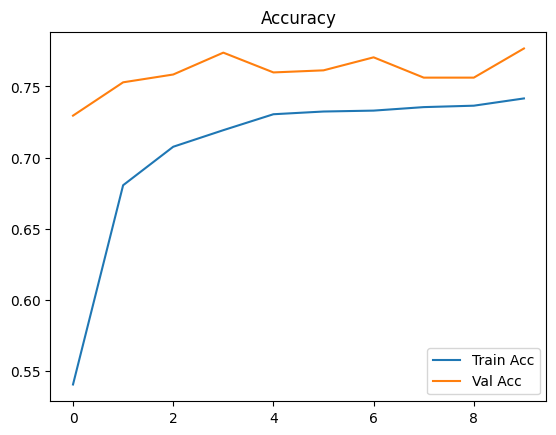

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


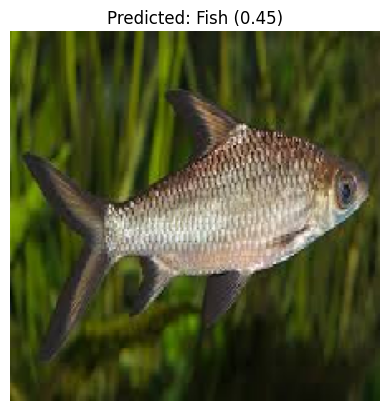

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

image_path = '/content/drive/MyDrive/TUGAS/download.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)

plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
plt.axis("off")
plt.show()
